<a href="https://colab.research.google.com/github/BraulioHermanson/BraulioHermanson/blob/main/Austin_Project_Aibnb1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Austin analysis of the prices and neighborhood on Airbnb

To start this analysis I'm gonna to use the dataset provided by the site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Using the city of Austin and working with the file listening.csv - Summary information.


In [1]:
# Import Libraries to work
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from IPython.core.pylabtools import figsize

sns.set_style('dark')
%matplotlib inline

In [2]:
# Read the file

df = pd.read_csv('https://raw.githubusercontent.com/BraulioHermanson/P_datasets/main/listings.csv')

# Data Analysis 

### **Dictionary of the variables**



*   `id` - The number used to identify the housing 
*   `name` - Name of the housing offered
*   `host_id` - Property host id number
*   `host_name` - Hostname
*   `neighbourhood_goup` - This column doesn't have values
*   `neighbourhood` - Neighborhood name
*   `latitude` - Property latitude coordinate
*   `longitude` - Property longitude coordinate
*   `room_type` - Type of room is offering
*   `price` - Price to rent the housing
*   `minimum_nights` - Minimum nights to stay on the housing
*   `number_of_reviews` - Number of reviews that the housing received
*   `last_review` - Data of the last review
*   `reviews_per_month` - Number of reviews in each month
*   `calculated_host_listings_count` - Amount of housing the host has.
*   `availability_365` - Availability number within 365 days








In [3]:
print('Dim of dataset',
  '\nVariveis: ',df.shape[1], '\n'
  'Entradas: ',df.shape[0])
df.head()

Dim of dataset 
Variveis:  16 
Entradas:  10350


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2265,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,NaN,78702,30.27752,-97.71377,Entire home/apt,200,7,26,2021-07-02,0.38,3,51
1,5245,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,NaN,78702,30.27614,-97.71320,Private room,114,30,9,2017-02-24,0.22,3,0
2,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26057,-97.73441,Entire home/apt,126,2,560,2021-06-21,27.27,1,329
3,5769,NW Austin Room,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,39,1,264,2021-07-03,6.42,1,30
4,6413,Gem of a Studio near Downtown,13879,Todd,NaN,78704,30.24885,-97.73587,Entire home/apt,104,30,117,2021-04-02,1.31,1,0


In [4]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
10345,50899252,Stay in a place of your own | 1BR in Austin,359036978,Shelby,NaN,78745,30.181934,-97.777781,Entire home/apt,117,30,0,NaN,NaN,158,365
10346,50899636,Brilliant apartment home | 1BR in Austin,359036978,Shelby,NaN,78729,30.447745,-97.783717,Entire home/apt,112,30,0,NaN,NaN,158,365
10347,50899637,Brilliant apartment home | 1BR in Austin,359036978,Shelby,NaN,78729,30.448854,-97.784034,Entire home/apt,119,30,0,NaN,NaN,158,365
10348,50901766,Mid-Century on a corner lot with fenced yard,80406,Dani,NaN,78704,30.241941,-97.742844,Entire home/apt,199,7,0,NaN,NaN,12,63
10349,50903601,Poolside Fun close to Downtown Sleeps 8 w/6 beds,4912146,Deacon,NaN,78705,30.290629,-97.750309,Entire home/apt,202,2,0,NaN,NaN,20,11


# **EDA - Exploratory Data Analysis**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10350 entries, 0 to 10349
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10350 non-null  int64  
 1   name                            10350 non-null  object 
 2   host_id                         10350 non-null  int64  
 3   host_name                       10334 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   10350 non-null  int64  
 6   latitude                        10350 non-null  float64
 7   longitude                       10350 non-null  float64
 8   room_type                       10350 non-null  object 
 9   price                           10350 non-null  int64  
 10  minimum_nights                  10350 non-null  int64  
 11  number_of_reviews               10350 non-null  int64  
 12  last_review                     

### **Dataframe**


The column `neighbourhood_group`, `last_review` and `reviews_per_month` I'm gonna ignored on the analysis because this column doesn't have relevant information for me.

In the columns `host_name` the code shows us some missing values.



## **ETL- Extract,Transform and Load**

In [6]:
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                            16
neighbourhood_group               10350
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        2406
reviews_per_month                  2406
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
(df.isnull().sum() / df.shape[0]).round(4)

id                                0.0000
name                              0.0000
host_id                           0.0000
host_name                         0.0015
neighbourhood_group               1.0000
neighbourhood                     0.0000
latitude                          0.0000
longitude                         0.0000
room_type                         0.0000
price                             0.0000
minimum_nights                    0.0000
number_of_reviews                 0.0000
last_review                       0.2325
reviews_per_month                 0.2325
calculated_host_listings_count    0.0000
availability_365                  0.0000
dtype: float64

In [8]:
# deleting columns
df.drop(columns=['neighbourhood_group', 'last_review', 'reviews_per_month'], inplace=True)

#deleting rows
df.dropna(axis=0, inplace=True)

In [9]:
print("Now:\t{}".format(df.shape))

Now:	(10334, 13)


In [10]:
print('Colunas:',df.columns)

Colunas: Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [11]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [12]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                       int64
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Checking if the df has outliers**

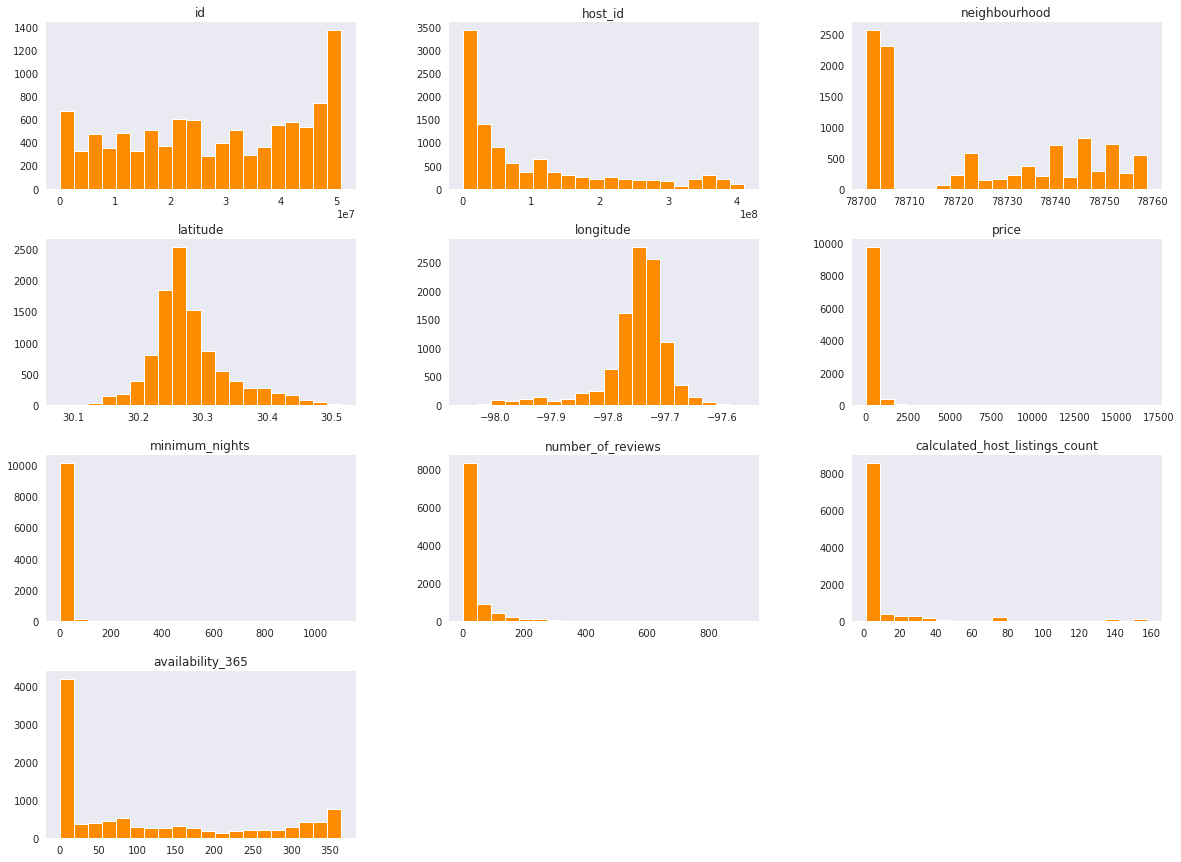

In [13]:
df.hist(figsize=(20,15), bins=20, color = "DarkOrange", grid=False)

sns.despine(left=True, bottom=True)

plt.show()

In [14]:
(df[['price','minimum_nights','number_of_reviews',
           'calculated_host_listings_count','availability_365']].describe()).round(2)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,10334.00,10334.00,10334.00,10334.00,10334.00
mean,277.31,7.72,32.96,10.42,116.56
std,546.52,24.39,69.91,27.60,130.50
min,0.00,1.00,0.00,1.00,0.00
25%,90.00,1.00,1.00,1.00,0.00
50%,150.00,2.00,6.00,1.00,63.50
75%,275.00,3.00,30.00,4.00,232.00
max,16845.00,1100.00,917.00,158.00,365.00


In [15]:
# identifying the outliers for the price variable
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR of the variable price: ', IQR_price)

# setting the limits                                       
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Upper limit of price: ', sup_price)
print('Inferior limit of price: ', inf_price)

IQR of the variable price:  185.0
Upper limit of price:  552.5
Inferior limit of price:  -187.5


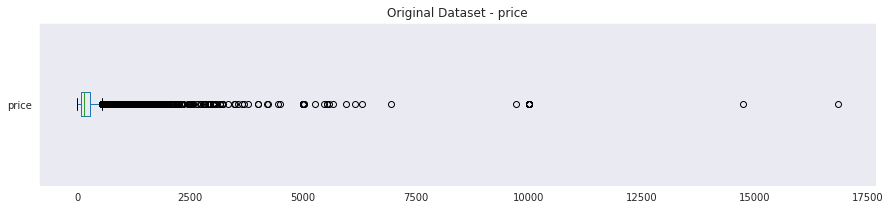

The dataset has 10334 columns
1046 Entries above 552.5
Represent 10.12% the dataset


In [16]:
# checking the original set
fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind='box', vert=False);
ax.set_title('Original Dataset - price')
plt.show()
print("The dataset has {} columns".format(df.shape[0]))
print("{} Entries above 552.5".format(len(df[df.price > 552.5])))
print("Represent {:.2f}% the dataset".format((len(df[df.price > 552.5]) / df.shape[0])*100))

In [17]:
# identifying the outliers for the variable minimum_nights
q1_nights = df.minimum_nights.quantile(.25)
q3_nights = df.minimum_nights.quantile(.75)
IQR_nights = q3_nights - q1_nights
print('IQR of the variable minimum_nights: ', IQR_nights)

# setting the limits                                       
sup_nights = q3_nights + 1.5 * IQR_nights
inf_nights = q1_nights - 1.5 * IQR_nights

print('Upper limit of minimum_nights: ', sup_nights)
print('Inferior limit of minimum_nights: ', inf_nights)

IQR of the variable minimum_nights:  2.0
Upper limit of minimum_nights:  6.0
Inferior limit of minimum_nights:  -2.0


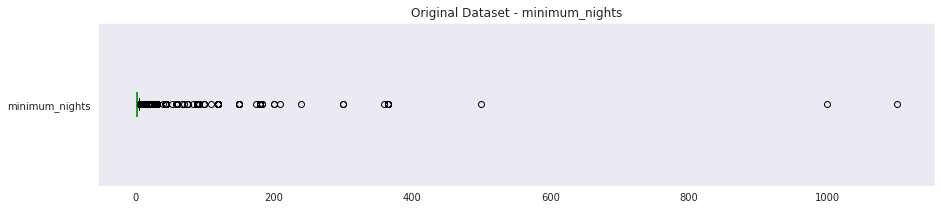

The dataset has 10334 columns
1728 Entries above 6
Represent 16.72% the dataset


In [18]:
# checking the original set
fig, ax = plt.subplots(figsize=(15,3))
df.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Original Dataset - minimum_nights')
plt.show()
print("The dataset has {} columns".format(df.shape[0]))
print("{} Entries above 6".format(len(df[df.minimum_nights > 6])))
print("Represent {:.2f}% the dataset".format((len(df[df.minimum_nights > 6]) / df.shape[0])*100))

In [19]:
# cleaning the dataset
df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > 552.5].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 6].index, axis=0, inplace=True)

print('Shape before cleaning: ', df.shape)
print('Shape after cleaning: ',df_clean.shape)


Shape before cleaning:  (10334, 13)
Shape after cleaning:  (7612, 13)


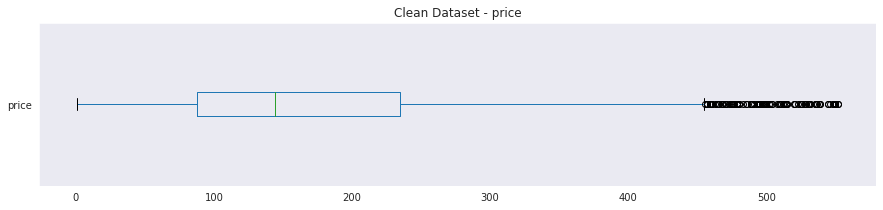

Original size: 10334 columns
Actual size: 7612 columns


In [20]:
# checking the clean set
fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False);
ax.set_title('Clean Dataset - price')
plt.show()
print("Original size: {} columns".format(df.shape[0]))
print("Actual size: {} columns".format(df_clean.shape[0]))

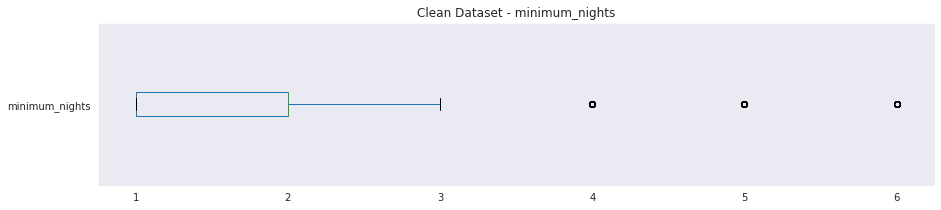

Original size: 10334 columns
Actual size: 7612 columns


In [21]:
fig, ax = plt.subplots(figsize=(15,3))
df_clean.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Clean Dataset - minimum_nights')
plt.show()
print("Original size: {} columns".format(df.shape[0]))
print("Actual size: {} columns".format(df_clean.shape[0]))

In [22]:
df_clean.describe().round(1)

,id,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,7612.0,7612.0,7612.0,7612.0,7612.0,7612.0,7612.0,7612.0,7612.0,7612.0
mean,27947625.4,94725662.5,78722.8,30.3,-97.7,176.0,1.9,38.4,7.5,96.6
std,15773754.7,108127882.7,20.6,0.1,0.1,118.6,1.0,77.1,21.1,121.8
min,5456.0,23.0,78701.0,30.1,-98.1,1.0,1.0,0.0,1.0,0.0
25%,15016269.8,12628034.0,78704.0,30.2,-97.8,88.0,1.0,1.0,1.0,0.0
50%,28141453.0,47201911.0,78721.0,30.3,-97.7,144.0,2.0,8.0,1.0,36.0
75%,42637930.2,141719824.5,78744.0,30.3,-97.7,235.0,2.0,38.0,3.0,167.0
max,50903601.0,410942702.0,78759.0,30.5,-97.6,552.0,6.0,917.0,142.0,365.0


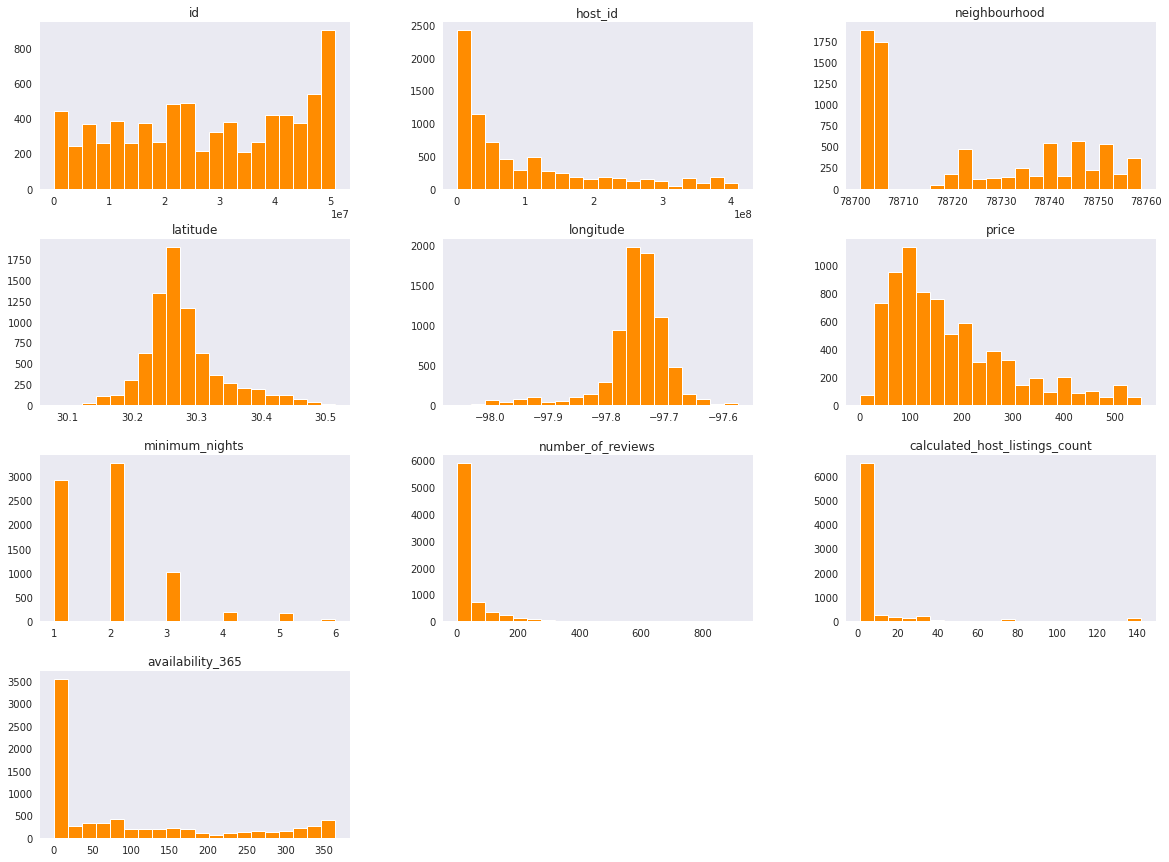

In [23]:
# checking distributions
df_clean.hist(figsize=(20,15), bins=20, color = "DarkOrange", grid=False);

sns.despine(left=True, bottom=True)

plt.show()

# **Correlations between the variables**

In [24]:
corr = (df_clean[['price', 'minimum_nights', 'number_of_reviews',
    'calculated_host_listings_count', 'availability_365']].corr()).round(2)

display(corr)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.00,0.21,-0.12,-0.01,0.09
minimum_nights,0.21,1.00,-0.06,-0.14,-0.06
number_of_reviews,-0.12,-0.06,1.00,-0.03,0.17
calculated_host_listings_count,-0.01,-0.14,-0.03,1.00,0.21
availability_365,0.09,-0.06,0.17,0.21,1.00


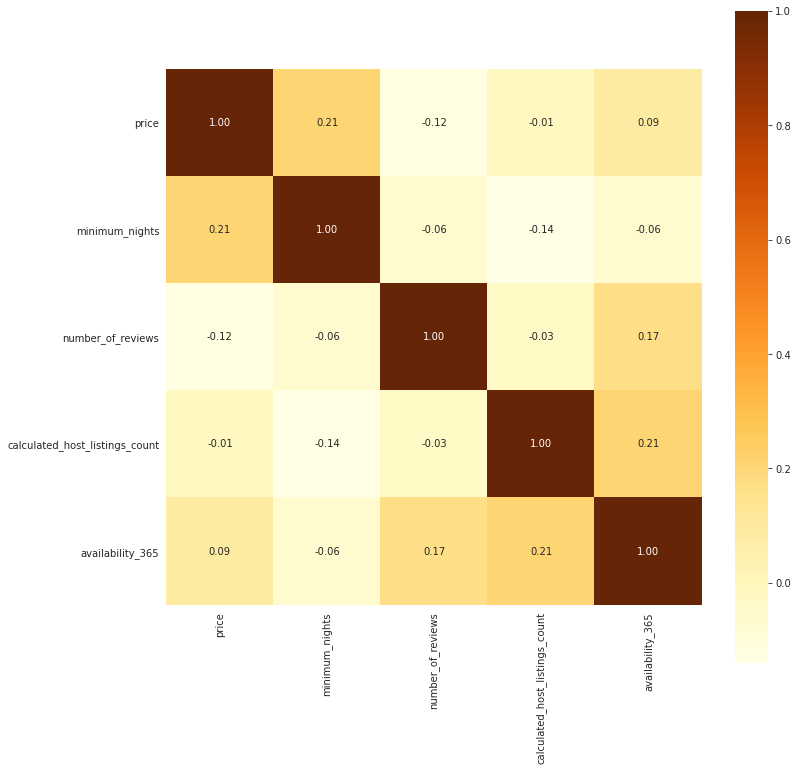

In [25]:
figsize(12, 12)

sns.heatmap(corr, cmap='YlOrBr', fmt='.2f',square=True, linecolor='white', annot=True);

# **Understand the type of housing in the Dateframe and which option is the most common to get**

In [26]:
df_clean.room_type.value_counts()

Entire home/apt    5850
Private room       1690
Shared room          66
Hotel room            6
Name: room_type, dtype: int64

In [27]:
(df_clean.room_type.value_counts() / df_clean.shape[0]).round(2)

Entire home/apt    0.77
Private room       0.22
Shared room        0.01
Hotel room         0.00
Name: room_type, dtype: float64

# **What is the most expensive neighborhood in the Dataframe?**

In [28]:
df_clean.neighbourhood.value_counts().sort_values(ascending=False)[:10]

78704    1317
78702     981
78701     570
78741     520
78705     424
78745     380
78703     326
78751     301
78723     264
78721     171
Name: neighbourhood, dtype: int64

In [29]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10].round(2)

neighbourhood
78712    500.00
78734    267.73
78701    240.92
78746    231.24
78732    228.53
78739    210.72
78733    205.28
78703    199.06
78702    197.60
78704    196.29
Name: price, dtype: float64

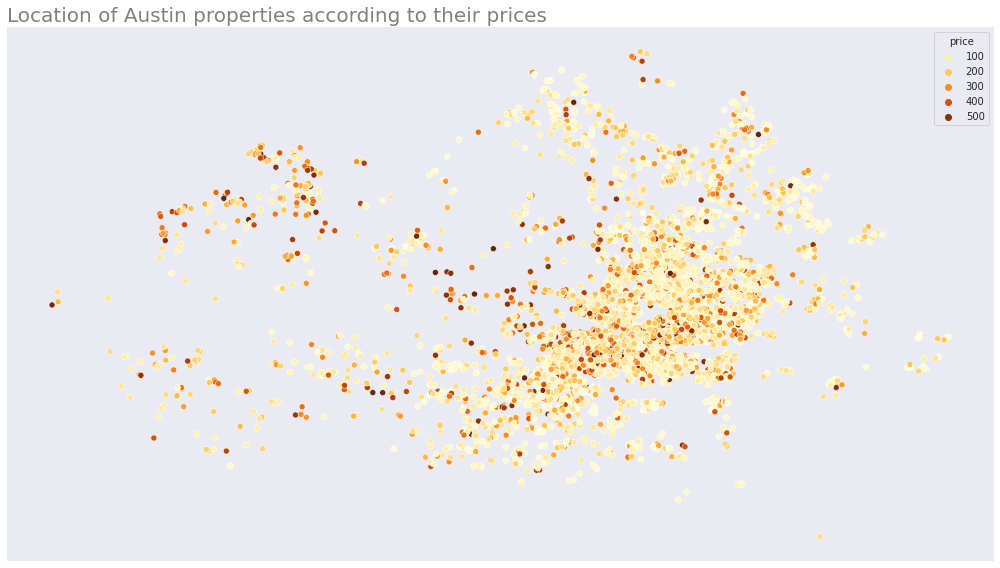

In [30]:
fig, ax = plt.subplots(figsize=(14,8))

sns.scatterplot(x="longitude", y="latitude", data=df_clean, hue="price", palette="YlOrBr")
ax.set_title("Location of Austin properties according to their prices", size=20, loc='left', color='grey')

sns.set_style('white')
sns.despine(left=True, bottom=True)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)


plt.tight_layout()

In [31]:
df_clean.loc[df_clean['neighbourhood'] == 78712,'price'].describe()


count      1.0
mean     500.0
std        NaN
min      500.0
25%      500.0
50%      500.0
75%      500.0
max      500.0
Name: price, dtype: float64

In [32]:
print('Rows:',df_clean.loc[df_clean['neighbourhood'] == 78712].shape[0])
print('Columns: ',df_clean.loc[df_clean['neighbourhood'] == 78712].shape[1])

Rows: 1
Columns:  13


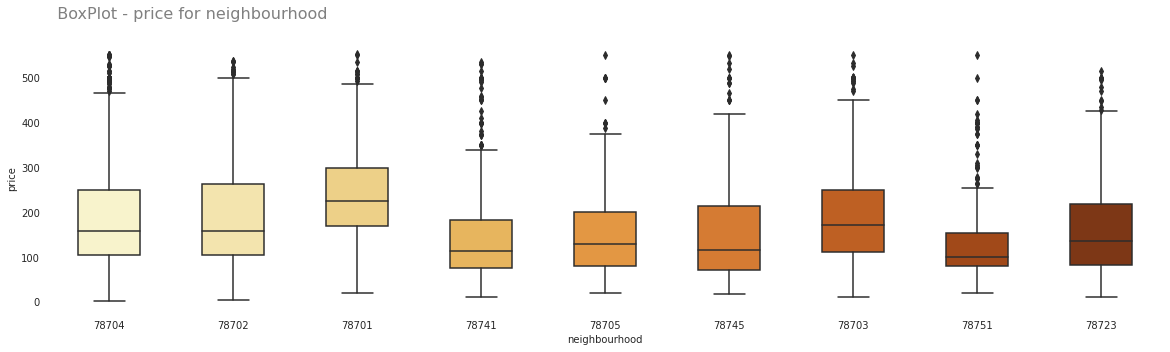

In [33]:
fig, ax = plt.subplots(figsize=(20,5))

sns.boxplot(x='neighbourhood',y='price',order = [78704,78702,78701,78741,78705,78745,78703,78751,78723],data=df_clean,palette='YlOrBr',width=0.5);

ax.set_title('  BoxPlot - price for neighbourhood\n', size=16, color='grey',loc='left')



sns.despine(left=True, bottom=True)
plt.show()

In [34]:
df_clean.loc[df_clean['neighbourhood'] == 78704,'price'].describe().round(2)

count    1317.00
mean      196.29
std       122.48
min         1.00
25%       105.00
50%       159.00
75%       250.00
max       550.00
Name: price, dtype: float64

In [35]:
df_clean.loc[df_clean['neighbourhood'] == 78704,'room_type'].value_counts()

Entire home/apt    1136
Private room        174
Shared room           7
Name: room_type, dtype: int64

In [36]:
df_clean.loc[df_clean['neighbourhood'] == 78705,'price'].describe().round(2)

count    424.00
mean     151.12
std       92.97
min       19.00
25%       80.00
50%      129.00
75%      200.00
max      550.00
Name: price, dtype: float64

In [37]:
df_clean.loc[df_clean['neighbourhood'] == 78705,'room_type'].value_counts()

Entire home/apt    298
Private room       111
Shared room         15
Name: room_type, dtype: int64

In [38]:
df_clean.loc[df_clean['neighbourhood'] == 78723,'price'].describe().round(2)

count    264.00
mean     170.67
std      117.39
min       10.00
25%       81.50
50%      135.50
75%      219.00
max      514.00
Name: price, dtype: float64

In [39]:
df_clean.loc[df_clean['neighbourhood'] == 78723,'room_type'].value_counts()

Entire home/apt    181
Private room        77
Shared room          6
Name: room_type, dtype: int64

In [40]:
!pip install folium -q

In [41]:
import folium

In [42]:
Austin = folium.Map(width="70%", height="70%",
                    location=[30.3074624, -98.0335911],
                    zoom_start=9.6,
                    min_zoom=9,
                    max_zoom=13
                    )
Austin.add_child(folium.ClickForMarker(popup='Add by the User'))
# Showing Austin
Austin

In [43]:
values=[78704,78705,78723]
filtered_df = df_clean[df_clean.neighbourhood.isin(values)]

In [44]:
colors = {
 78704: 'orange',
 78705: 'blue',
 78723: 'red',
 }

Austin_n = folium.Map(width="70%", height="70%",
                    location=[30.3074624, -98.0335911],
                    zoom_start=9.6,
                    min_zoom=9,
                    max_zoom=13
)

for _, df_clean in filtered_df.iterrows():
    if df_clean['neighbourhood'] in colors.keys():
        folium.Marker(
            location=[df_clean['latitude'], df_clean['longitude']],
            icon=folium.Icon(color=colors[df_clean['neighbourhood']])
        ).add_to(Austin_n)

In [45]:
Austin_n